In [103]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree

In [104]:
data = pd.read_csv('hmelq.csv')
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [105]:
data = data.dropna() 
data.isnull().sum().any()

False

In [106]:
data.shape

(2018, 13)

In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


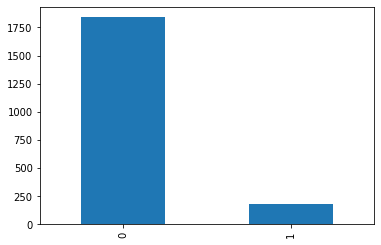

In [108]:
data['bad'].value_counts().plot.bar()

In [109]:
data['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [110]:
dms = pd.get_dummies(data[["reason", "job"]])
dms.tail()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
3544,0,1,0,0,0,0,0,1
3546,0,1,0,0,0,0,0,1
3547,1,0,0,0,0,0,0,1
3548,0,1,0,0,0,0,0,1
3549,0,1,0,0,0,0,0,1


In [111]:
y=data["bad"]
X_ = data.drop(["reason", "job", "bad"], axis=1).astype("float64")
X= pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_Other", "job_ProfEx", "job_Sales", "job_Self"]]], axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0


In [112]:
X = X.drop(['mortdue','value','yoj','ninq','reason_DebtCon'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1816, 12)
y_train shape: (1816,)
X_test shape: (202, 12)
y_test shape: (202,)


#### Decision Tree Classification

In [113]:
from sklearn.tree import DecisionTreeClassifier 

In [114]:
bank = DecisionTreeClassifier()
bank_model = bank.fit(X_train, y_train)
bank_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

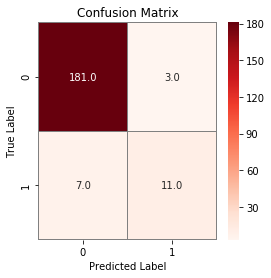

In [115]:
y_pred = bank_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [116]:
accuracy_score(y_test, y_pred)

0.9504950495049505

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       184
           1       0.79      0.61      0.69        18

    accuracy                           0.95       202
   macro avg       0.87      0.80      0.83       202
weighted avg       0.95      0.95      0.95       202



In [118]:
bank_grid = {"max_depth": range(1,10),
              "min_samples_split": list(range(2,50))}

In [119]:
bank = tree.DecisionTreeClassifier()
bank_cv=GridSearchCV(bank, bank_grid, cv=10, n_jobs=-1, verbose=2) 
bank_cv_model = bank_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1091 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 2223 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3683 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   17.0s finished


In [120]:
print("En iyi parametreler: "+str(bank_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'min_samples_split': 3}


In [121]:
bank = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=3)
bank_tuned = bank.fit(X_train, y_train)

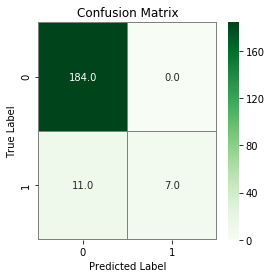

In [122]:
y_pred = bank_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [123]:
accuracy_score(y_pred, y_test)

0.9455445544554455

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       184
           1       1.00      0.39      0.56        18

    accuracy                           0.95       202
   macro avg       0.97      0.69      0.77       202
weighted avg       0.95      0.95      0.93       202



#### Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

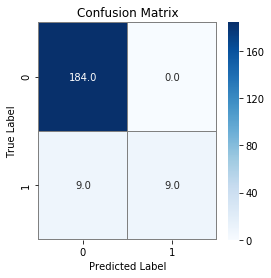

In [126]:
y_pred = rf_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [127]:
accuracy_score(y_test, y_pred)

0.9554455445544554

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       184
           1       1.00      0.50      0.67        18

    accuracy                           0.96       202
   macro avg       0.98      0.75      0.82       202
weighted avg       0.96      0.96      0.95       202



In [129]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8], 
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [130]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=5)

In [131]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 455 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 653 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 887 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [132]:
print("En iyi parametreler: "+str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [133]:
rf_tuned = RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=2, n_estimators=500)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

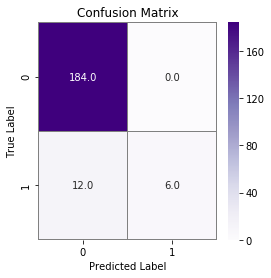

In [134]:
y_pred = rf_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [135]:
accuracy_score(y_test, y_pred)

0.9405940594059405

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       184
           1       1.00      0.33      0.50        18

    accuracy                           0.94       202
   macro avg       0.97      0.67      0.73       202
weighted avg       0.94      0.94      0.93       202



In [137]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

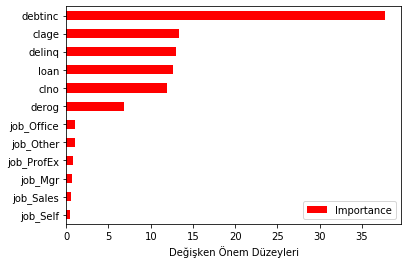

In [138]:
Importance.sort_values(by = "Importance",
                      axis=0,
                      ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişken Önem Düzeyleri")

#### Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

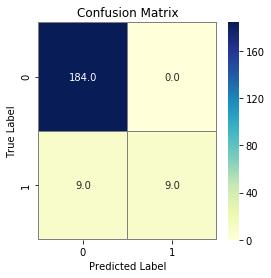

In [140]:
y_pred = gbm_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [141]:
accuracy_score(y_test, y_pred)

0.9554455445544554

In [142]:
#Model Tuning
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [143]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [3,5,10],
              "min_samples_split": [2,5,10]}

In [144]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=5)

In [145]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [146]:
print("En iyi parametreler: "+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [147]:
gbm = GradientBoostingClassifier(learning_rate=0.1,
                                max_depth=10,
                                min_samples_split=5,
                                n_estimators=100)

In [148]:
gbm_tuned = gbm.fit(X_train, y_train)

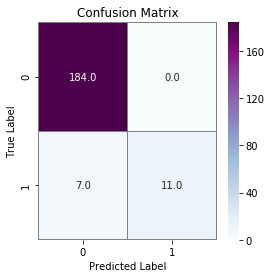

In [150]:
y_pred=gbm_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [151]:
accuracy_score(y_test, y_pred)

0.9653465346534653

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       184
           1       1.00      0.61      0.76        18

    accuracy                           0.97       202
   macro avg       0.98      0.81      0.87       202
weighted avg       0.97      0.97      0.96       202



#### Neural Network 

In [171]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [172]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [173]:
X_test_scaled[0:5]

array([[ 0.69667996,  1.41002795, -0.32896268,  0.07914046,  1.56543469,
         0.1278672 , -0.39955275, -0.44928062, -0.79382717,  1.6683325 ,
        -0.12513974, -0.16998584],
       [ 0.22706824, -0.2602987 , -0.32896268,  0.38372152,  0.185575  ,
         1.07344899, -0.39955275,  2.22578039, -0.79382717, -0.5994009 ,
        -0.12513974, -0.16998584],
       [-0.17808697, -0.2602987 , -0.32896268, -0.30176531, -0.13285416,
        -0.99704705, -0.39955275,  2.22578039, -0.79382717, -0.5994009 ,
        -0.12513974, -0.16998584],
       [-0.25175155, -0.2602987 , -0.32896268,  1.4810986 ,  0.50400416,
        -0.77855545, -0.39955275, -0.44928062, -0.79382717, -0.5994009 ,
        -0.12513974,  5.88284312],
       [-1.08968619, -0.2602987 , -0.32896268, -0.74798972, -1.19428469,
         0.41597507, -0.39955275,  2.22578039, -0.79382717, -0.5994009 ,
        -0.12513974, -0.16998584]])

In [174]:
from sklearn.neural_network import MLPClassifier

In [175]:
mlpc=MLPClassifier().fit(X_train,y_train)

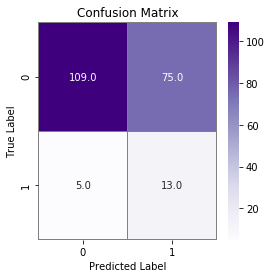

In [176]:
y_pred=mlpc.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [177]:
accuracy_score(y_test,y_pred)

0.6039603960396039

In [178]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [160]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [161]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         '

In [162]:
print('En iyi parametreler:', mlpc_cv_model.best_params_)

En iyi parametreler: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [164]:
mlpc_tuned = MLPClassifier(activation="relu",
                          alpha=1e-05,
                          hidden_layer_sizes=(100,100),
                          solver="adam")

In [165]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

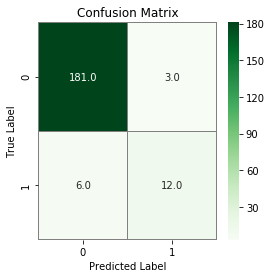

In [167]:
y_pred = mlpc_tuned.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [168]:
accuracy_score(y_test, y_pred)

0.9554455445544554

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.80      0.67      0.73        18

    accuracy                           0.96       202
   macro avg       0.88      0.83      0.85       202
weighted avg       0.95      0.96      0.95       202



#### SVM

In [180]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear").fit(X_train, y_train)

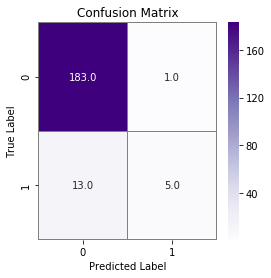

In [182]:
y_pred = svm_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [184]:
accuracy_score(y_test, y_pred)

0.9306930693069307

In [185]:
#model tuning
svc_params= {"C": np.arange(1,10)}
svc = SVC(kernel="linear")
svc_cv_model=GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 25.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [186]:
print('En iyi parametreler:', svc_cv_model.best_params_)

En iyi parametreler: {'C': 5}


In [187]:
svc_cv_tuned = SVC(C=5)

In [188]:
svc_cv_tuned.fit(X_train_scaled, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

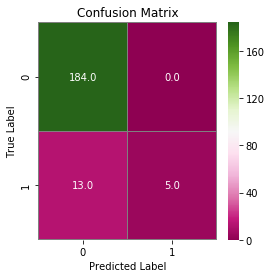

In [189]:
y_pred = svc_cv_tuned.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="PiYG",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [190]:
accuracy_score(y_test, y_pred)

0.9356435643564357

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       184
           1       1.00      0.28      0.43        18

    accuracy                           0.94       202
   macro avg       0.97      0.64      0.70       202
weighted avg       0.94      0.94      0.92       202

